In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from pathlib import Path

In [166]:
sns.set_style('whitegrid')
sns.set_palette('pastel')
palette = sns.color_palette("Greens", n_colors=8)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[palette[3]])

In [183]:
def draw_curves(measures, measures_num="all"):  
    
    title_fontsize = 20
    label_fontsize = 18
    tick_fontsize = 13
    
    if measures_num == "all": 
        fig, axes = plt.subplots(2,2, figsize=(16,12))
        
        axes[0,0].plot(measures.index, measures['elbow'], marker='o')
        axes[0,0].set_title("Elbow Method", 
                            fontsize=title_fontsize)
        axes[0,0].set_ylabel('WCSS', 
                             fontsize=label_fontsize)
        axes[0,0].tick_params(axis='both', labelsize=tick_fontsize)
        
        axes[0,1].plot(measures.index, measures['silh'], marker='o')
        axes[0,1].set_title("Silhouette Coefficient", 
                            fontsize=title_fontsize)
        axes[0,1].set_xlim(1,)
        axes[0,1].set_ylabel('Average silhouette coefficient', 
                             fontsize=label_fontsize)
        axes[0,1].tick_params(axis='both', labelsize=tick_fontsize)
        
        axes[1,0].plot(measures.index, measures['dbi'], marker='o')
        axes[1,0].set_title("Davies-Bouldin Score", 
                            fontsize=title_fontsize)
        axes[1,0].set_xlim(1,)
        axes[1,0].set_ylabel('Davies-Bouldin score', 
                             fontsize=label_fontsize)
        axes[1,0].tick_params(axis='both', labelsize=tick_fontsize)
        
        axes[1,1].plot(measures.index, measures['ch'], marker='o')
        axes[1,1].set_title("Calinski-Harabasz Index", 
                            fontsize=title_fontsize)
        axes[1,1].set_xlim(1,)
        axes[1,1].set_ylabel('Calinski-Harabasz index', 
                             fontsize=label_fontsize)
        axes[1,1].tick_params(axis='both', labelsize=tick_fontsize)
    
    if measures_num == "no elbow":
        fig, axes = plt.subplots(2,2, figsize=(16,12))
        
        axes[0,0].plot(measures.index, measures['silh'], marker='o')
        axes[0,0].set_title("Silhouette Coefficient", 
                            fontsize=title_fontsize)
        axes[0,0].set_xlim(1,)
        axes[0,0].set_ylabel('Average silhouette coefficient', 
                             fontsize=label_fontsize)
        axes[0,0].tick_params(axis='both', labelsize=tick_fontsize)
        
        axes[0,1].plot(measures.index, measures['dbi'], marker='o')
        axes[0,1].set_title("Davies-Bouldin Score", 
                            fontsize=title_fontsize)
        axes[0,1].set_xlim(1,)
        axes[0,1].set_ylabel('Davies-Bouldin score', 
                             fontsize=label_fontsize)
        axes[0,1].tick_params(axis='both', labelsize=tick_fontsize)
        
        axes[1,0].plot(measures.index, measures['ch'], marker='o')
        axes[1,0].set_title("Calinski-Harabasz Index", 
                            fontsize=title_fontsize)
        axes[1,0].set_xlim(1,)
        axes[1,0].set_ylabel('Calinski-Harabasz index', 
                             fontsize=label_fontsize)
        axes[1,0].tick_params(axis='both', labelsize=tick_fontsize)
        
    if measures_num == "only elbow":
        plt.figure(figsize=(8,6))
        plt.plot(measures.index+1, measures['elbow'], marker='o')
        plt.title("Elbow Method", 
                            fontsize=title_fontsize)
        plt.ylabel('WCSS', 
                    fontsize=label_fontsize)
        plt.tick_params(axis='both', labelsize=tick_fontsize)

# K-Means

## standarized

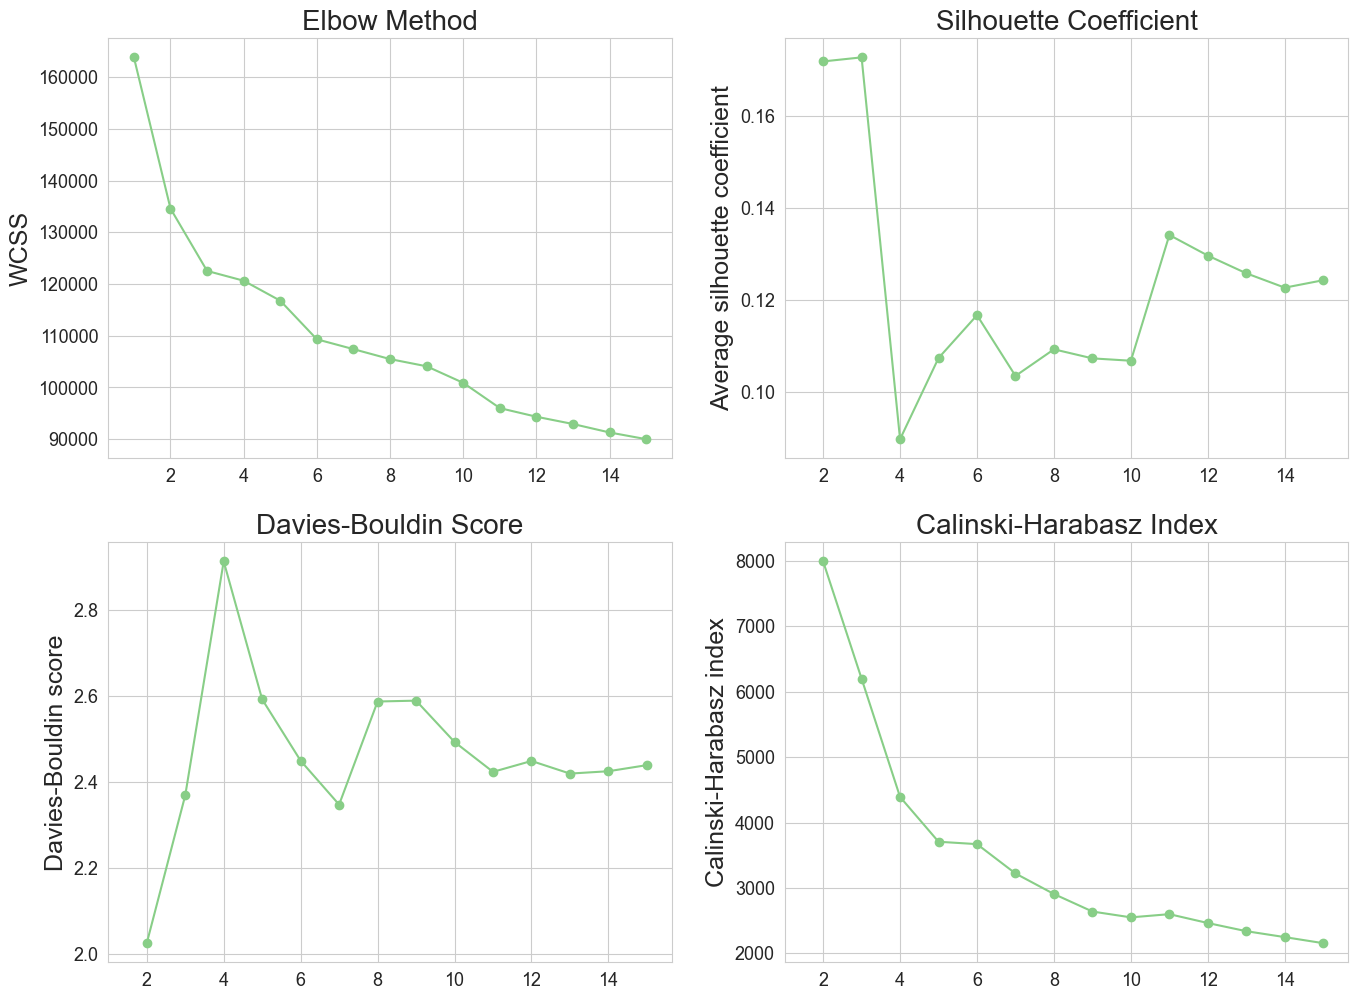

In [184]:
kmeans_standarized_train = pd.read_csv(Path('..','adults_data',
                                           'K-Means_measures_ohs_train.csv'), index_col=0)
draw_curves(kmeans_standarized_train)
plt.savefig(Path('..','plots','K-Means_ohs_train.pdf'), 
            format='pdf', bbox_inches='tight')

## normalized

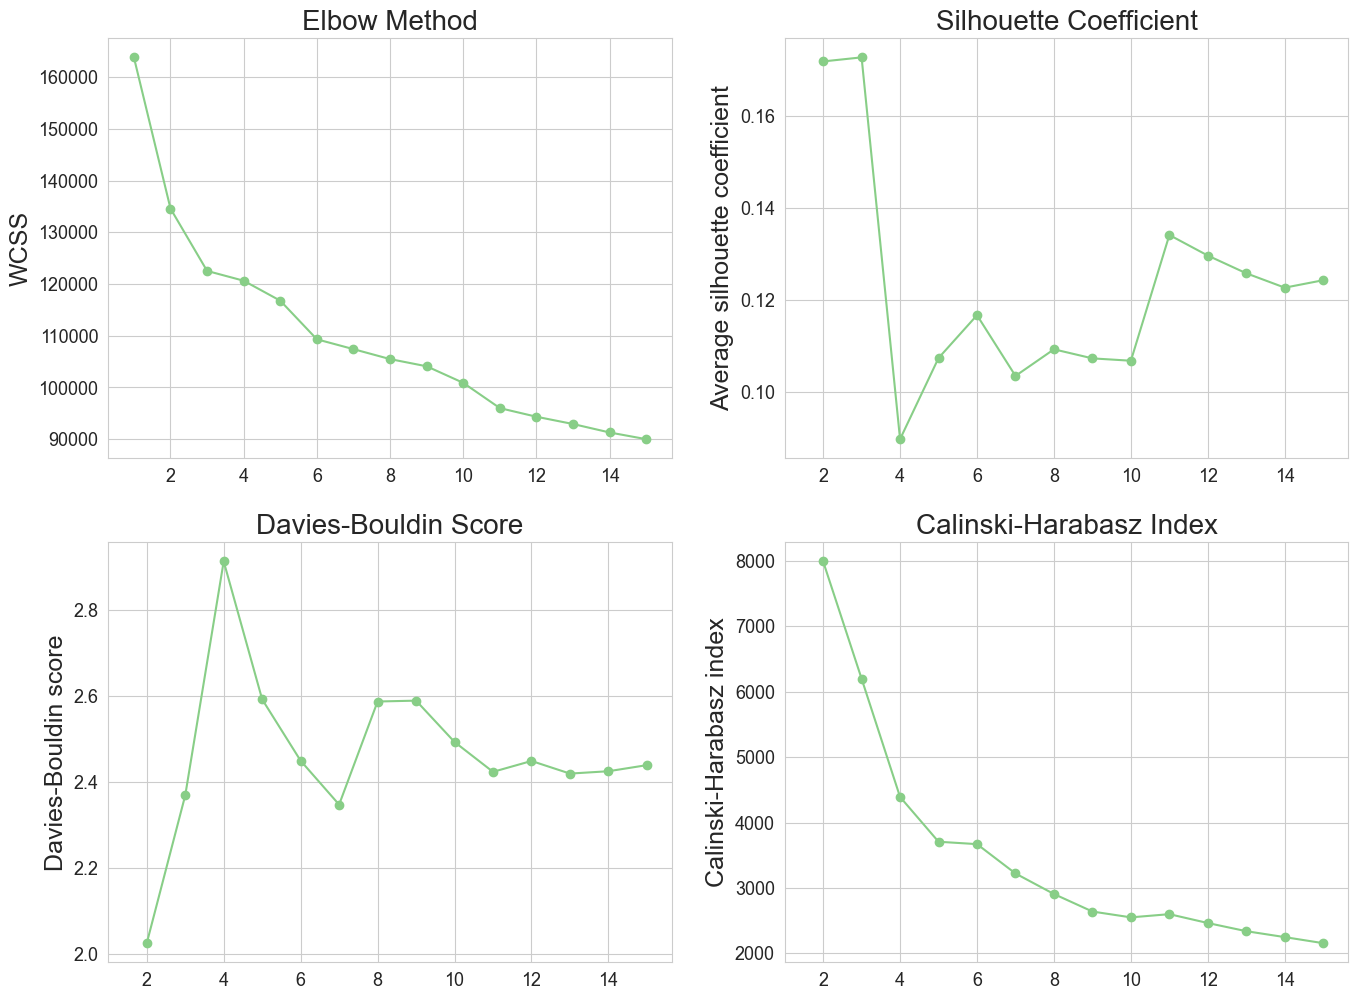

In [185]:
kmeans_normalized_train = pd.read_csv(Path('..','adults_data',
                                           'K-Means_measures_ohn_train.csv'), index_col=0)
draw_curves(kmeans_normalized_train)
plt.savefig(Path('..','plots','K-Means_ohn_train.pdf'), 
            format='pdf', bbox_inches='tight')

## conclusion

The best option is **standarized** with **8** clusters

In [186]:
kmeans_standarized_test = pd.read_csv(Path('..','server',
                                           'kmeans_8_ohs.csv'), index_col=0)
kmeans_standarized_test

,elbow,silh,dbi,ch
1,155332.205308,0.263677,1.426749,2482.56235


but for **normalized** data the best is **3** 

In [187]:
kmeans_normalized_test = pd.read_csv(Path('..','server',
                                           'kmeans_3_ohn.csv'), index_col=0)
kmeans_normalized_test

,elbow,silh,dbi,ch
1,122529.479699,0.218227,2.008547,2538.769762


# K-Medoids

## standarized

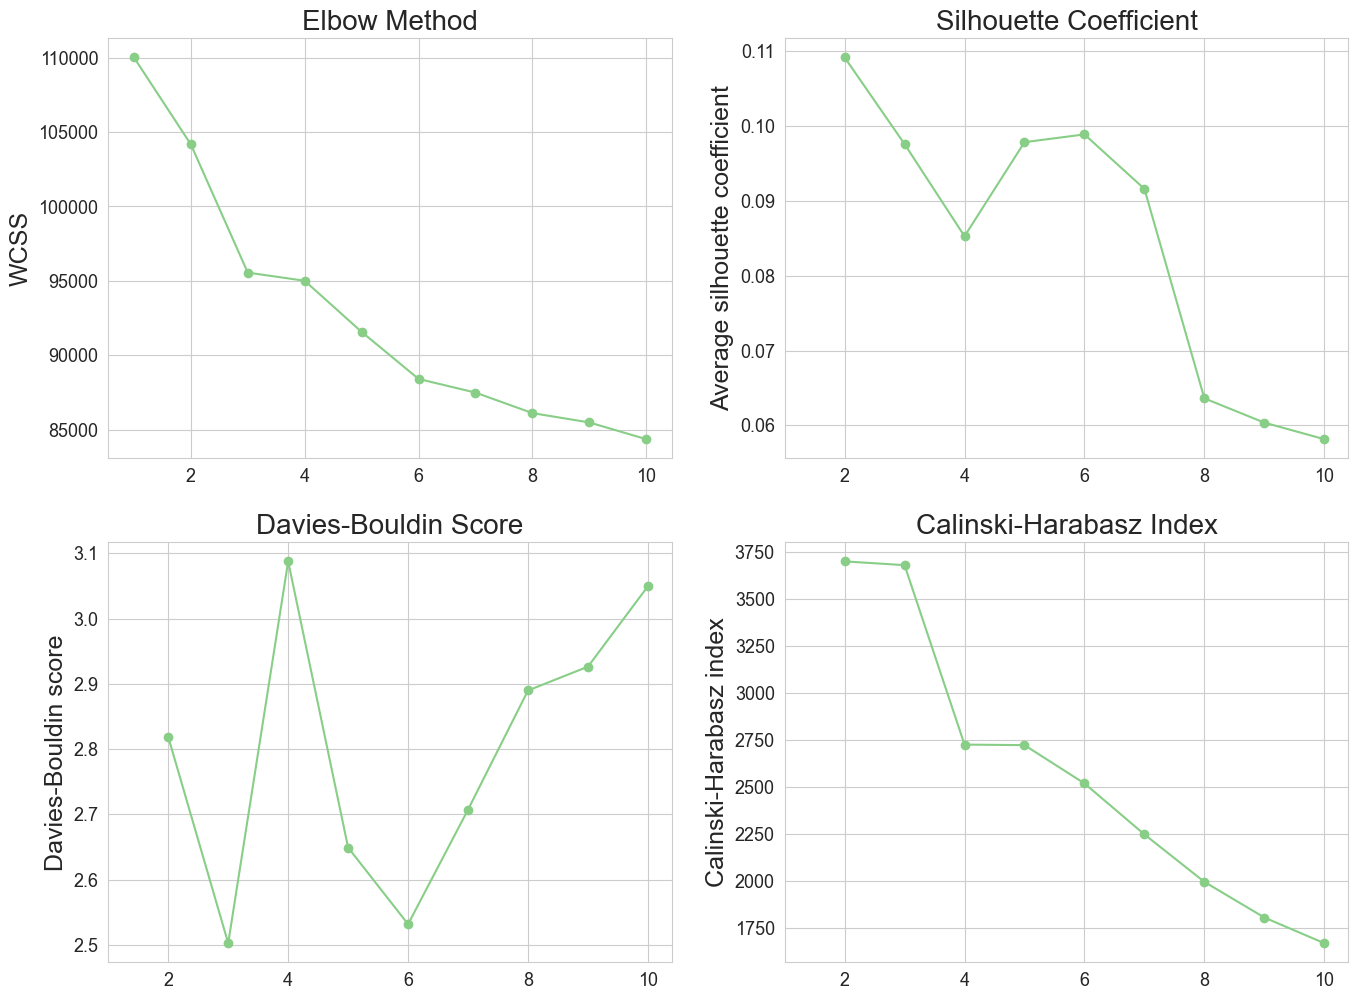

In [188]:
kmedoids_standarized_train = pd.read_csv(Path('..','server',
                                           'K-medoids_measures_ohs_train.csv'), index_col=0)
draw_curves(kmedoids_standarized_train)
plt.savefig(Path('..','plots','K-Medoids_ohs_train.pdf'), 
            format='pdf', bbox_inches='tight')

## normalized

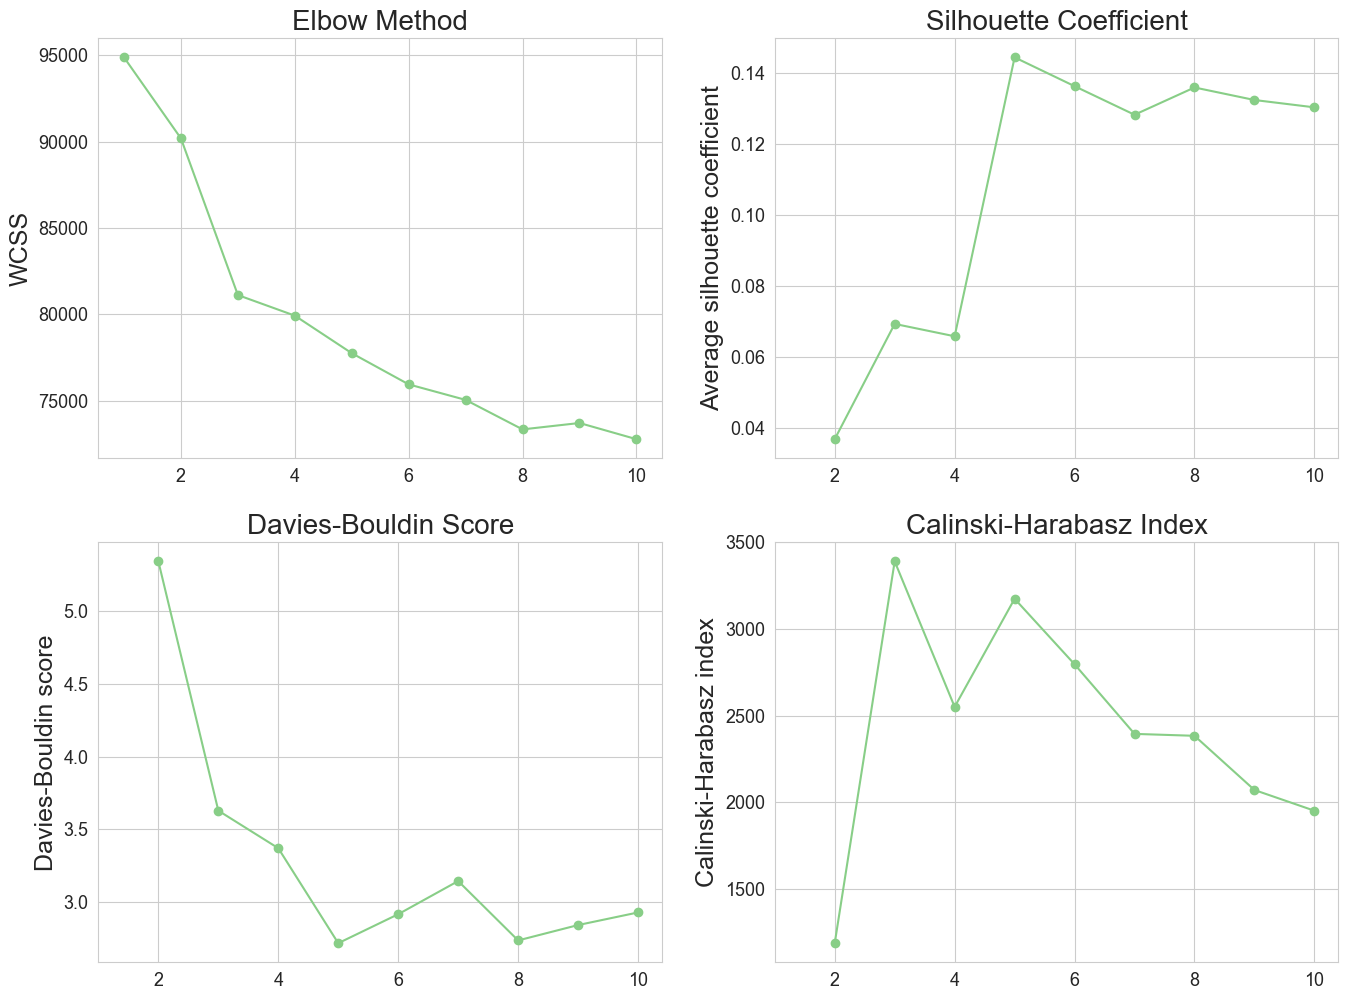

In [189]:
kmedoids_normalized_train = pd.read_csv(Path('..','server',
                                           'K-medoids_measures_ohn_train.csv'), index_col=0)
draw_curves(kmedoids_normalized_train)
plt.savefig(Path('..','plots','K-Medoids_ohn_train.pdf'), 
            format='pdf', bbox_inches='tight')

## conclusion

The best option is **normalized** with **5** clusters

In [190]:
kmedoids_normalized_test = pd.read_csv(Path('..','server',
                                           'kmedoids_5_ohn.csv'), index_col=0)
kmedoids_normalized_test

,elbow,silh,dbi,ch
1,77757.309395,0.218185,1.99031,1785.951856


but for **standarized** the best is **3**

In [191]:
kmedoids_standarized_test = pd.read_csv(Path('..','server',
                                           'kmedoids_3_ohs.csv'), index_col=0)
kmedoids_standarized_test

,elbow,silh,dbi,ch
1,95552.621216,0.139688,2.193054,1393.476356


# K-Prototype

## standarized

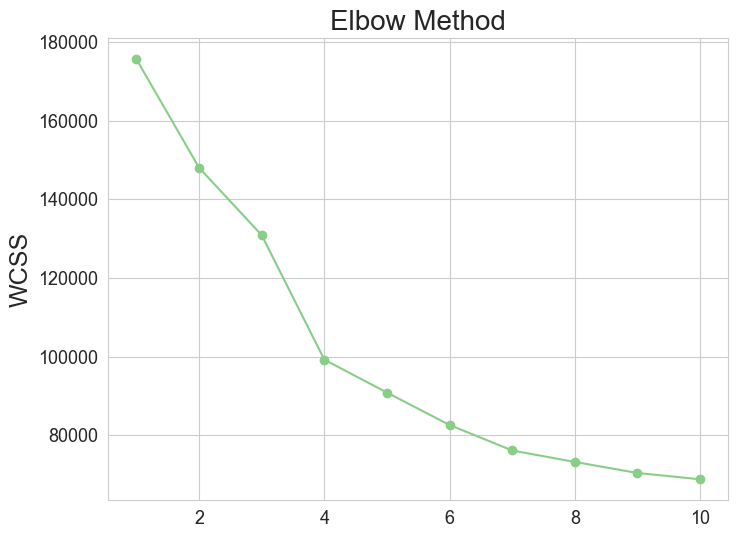

In [192]:
kprototype_standarized_train = pd.read_csv(Path('..','server',
                                           'k-prototype_std_train.csv'))
draw_curves(kprototype_standarized_train, 'only elbow')
plt.savefig(Path('..','plots','K-Prototype_std_train.pdf'), 
            format='pdf', bbox_inches='tight')

## normalized

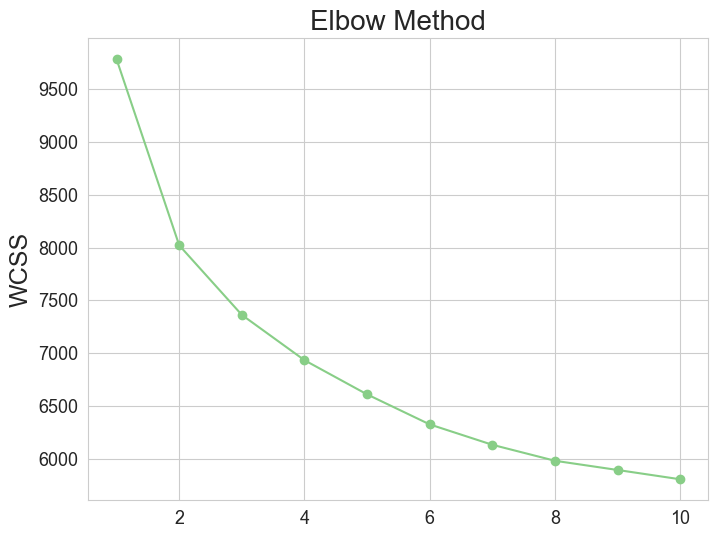

In [193]:
kprototype_normalized_train = pd.read_csv(Path('..','server',
                                           'k-prototype_norm_train.csv'))
draw_curves(kprototype_normalized_train, 'only elbow')
plt.savefig(Path('..','plots','K-Prototype_norm_train.pdf'), 
            format='pdf', bbox_inches='tight')

## Conclusion

The best option is **standarized 6**

In [194]:
kprototype_standarized_test = pd.read_csv(Path('..','server',
                                           'kprototype_6_std.csv'))
kprototype_standarized_test

,Unnamed: 0,elbow
0,1,82649.835551


for **normalized** the best is **2**

In [195]:
kprototype_normalized_test = pd.read_csv(Path('..','server',
                                           'kprototype_2_norm.csv'), 
                                        index_col=0)
kprototype_normalized_test

,elbow
1,8022.094955


# AGNES

## standarized

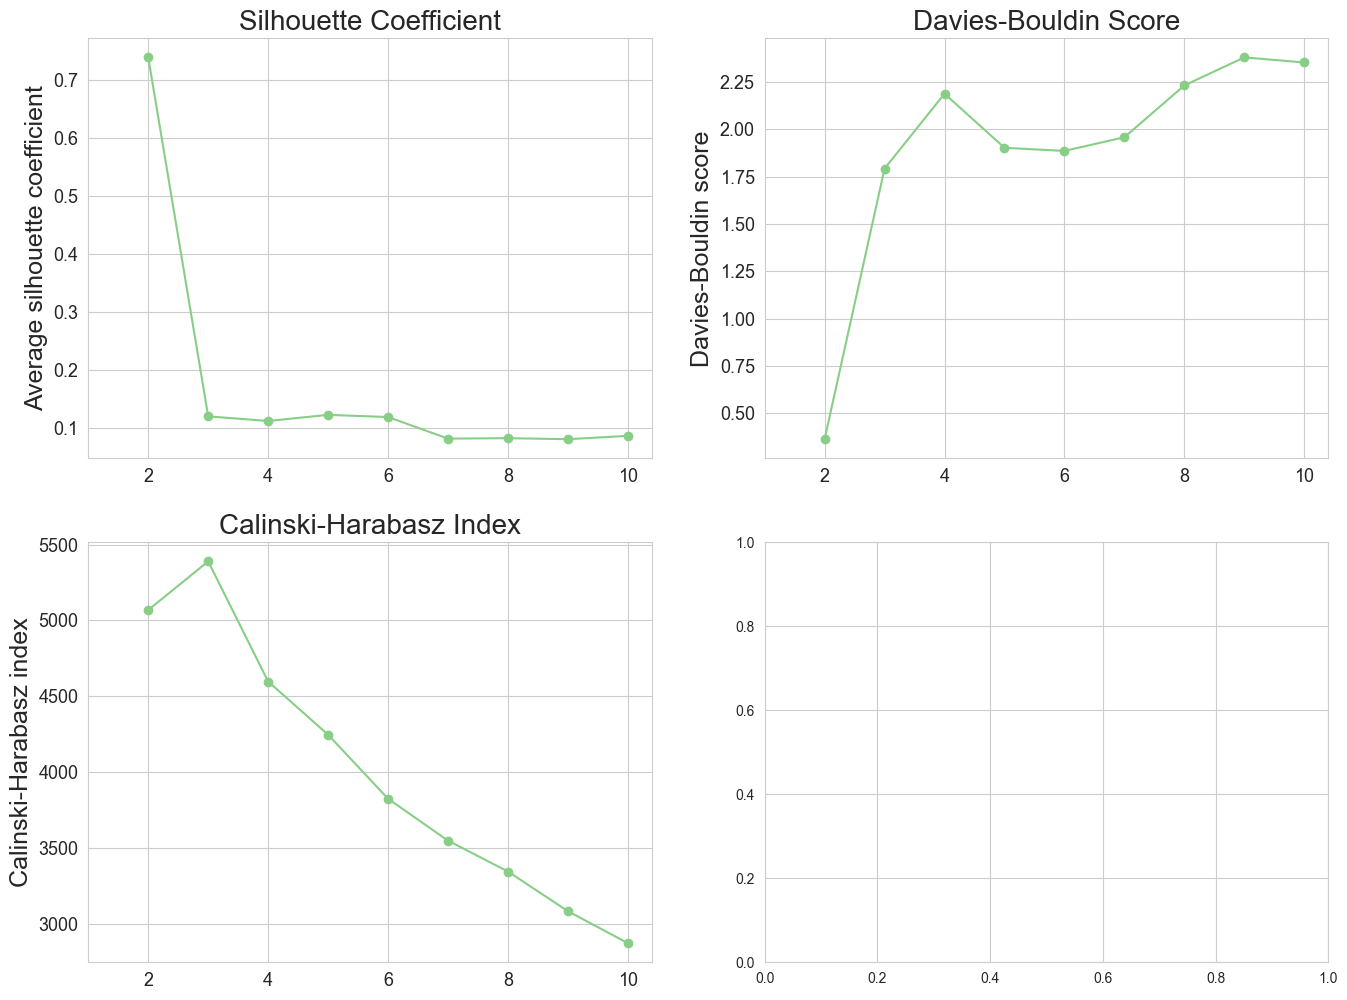

In [196]:
agnes_standarized_train = pd.read_csv(Path('..','server',
                                           'agnes_measures_ohs_train.csv'), index_col=0)
draw_curves(agnes_standarized_train, 'no elbow')
plt.savefig(Path('..','plots','agg_ohs_train.pdf'), 
            format='pdf', bbox_inches='tight')

## normalized

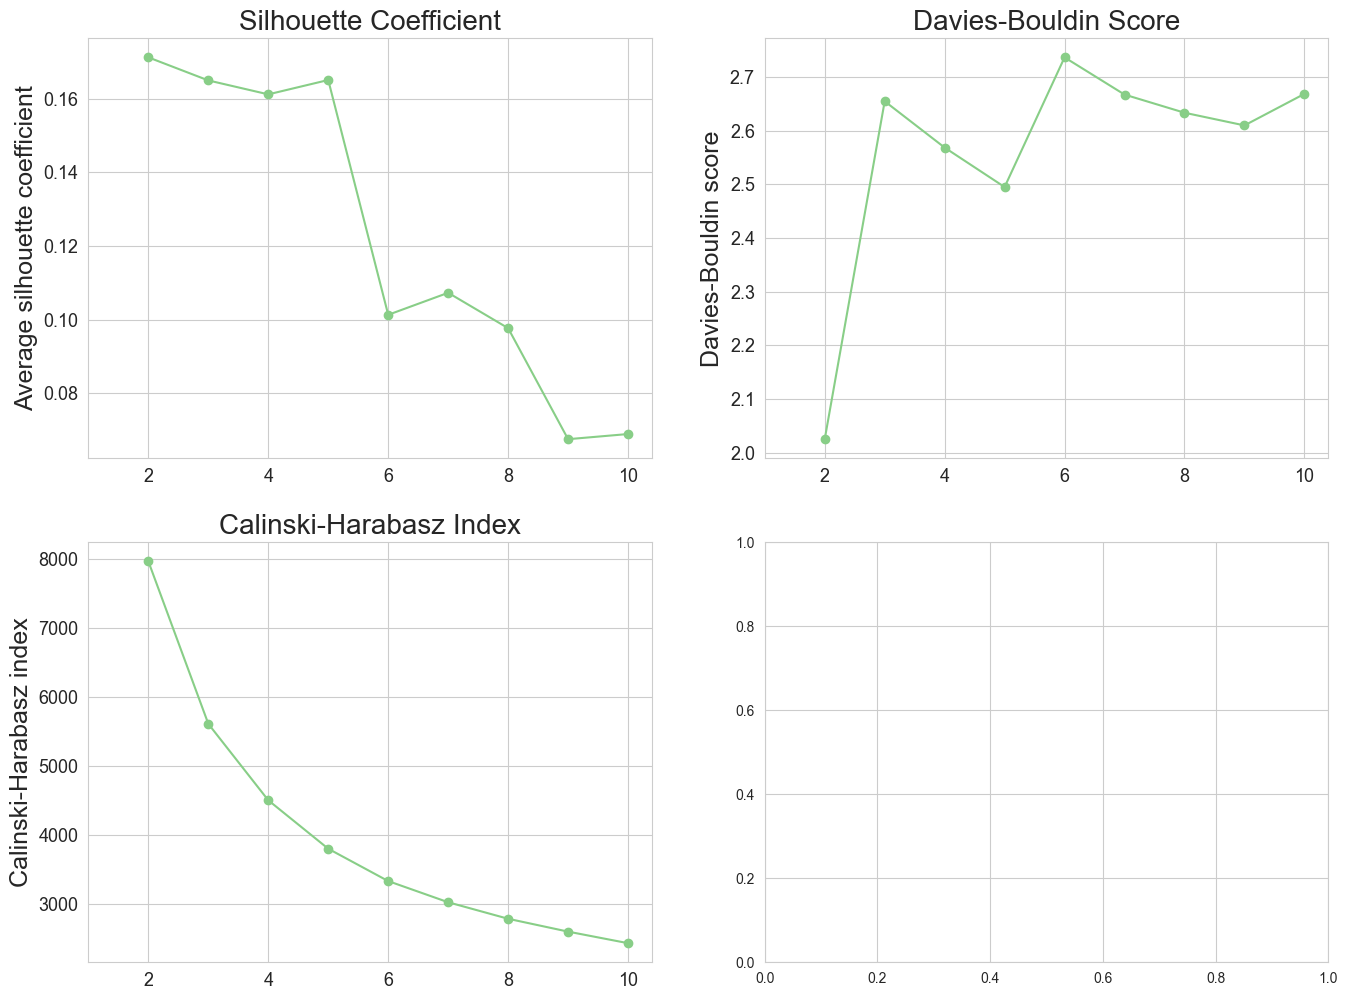

In [197]:
agnes_normalized_train = pd.read_csv(Path('..','server',
                                           'agnes_measures_ohn_train.csv'), index_col=0)
draw_curves(agnes_normalized_train, 'no elbow')
plt.savefig(Path('..','plots','agg_ohn_train.pdf'), 
            format='pdf', bbox_inches='tight')

## conclusion

The best option is **standarized** with **2** clusters

In [181]:
# tutaj się nie da na treningowym policzyc bo to hierarchiczne

In [ ]:
agnes_standarized_test = pd.read_csv(Path('..','server',
                                           'agglomerative_2_ohs.csv'), index_col=0)
agnes_standarized_test.loc[2,:]

for **normalized** the best is **2**

In [132]:
agnes_normalized_test = pd.read_csv(Path('..','server',
                                           'agnes_measures_ohn_test.csv'), index_col=0)

agnes_normalized_test

silh       0.167266
dbi        2.099069
ch      1896.761593
Name: 2, dtype: float64